# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('movies_2021.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data.shape


(6116, 6)

In [5]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
0,1,04/23/2019,Avengers: Endgame,"$400,000,000","$858,373,000","$2,797,800,564"
1,2,05/20/2011,Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"
2,3,04/22/2015,Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979"
3,4,12/16/2015,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,064,615,817"
4,5,04/25/2018,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,044,540,523"


In [6]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
6111,6112,12/31/2004,The Mongol King,"$7,000",$900,$900
6112,6113,04/02/1999,Following,"$6,000","$48,482","$240,495"
6113,6114,07/13/2005,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
6114,6115,09/29/2015,A Plague So Pleasant,"$1,400",$0,$0
6115,6116,08/05/2005,My Date With Drew,"$1,100","$181,041","$181,041"


In [7]:
data.sample()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
1050,1051,04/16/2004,Kill Bill: Volume 2,"$55,000,000","$66,207,920","$153,535,982"


In [8]:
data.isna().values.any()

False

In [9]:
data.duplicated().values.any()

False

We can see the total number of duplicates by creating a subset and looking at the length of that subset:

In [10]:
duplicated_rows = data[data.duplicated()]
len(duplicated_rows)

0

We can also see if there are null values in .info() which also shows us that we need to do some type conversion.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6116 entries, 0 to 6115
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   6116 non-null   int64 
 1   Release_Date           6116 non-null   object
 2   Movie_Title            6116 non-null   object
 3   USD_Production_Budget  6116 non-null   object
 4   USD_Domestic_Gross     6116 non-null   object
 5   USD_Worldwide_Gross    6116 non-null   object
dtypes: int64(1), object(5)
memory usage: 286.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [12]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']
 
for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data[col] = data[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])

data.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_780\1456950260.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].astype(str).str.replace(char, "")


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
0,1,04/23/2019,Avengers: Endgame,400000000,858373000,2797800564
1,2,05/20/2011,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802
2,3,04/22/2015,Avengers: Age of Ultron,365000000,459005868,1395316979
3,4,12/16/2015,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817
4,5,04/25/2018,Avengers: Infinity War,300000000,678815482,2044540523


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [13]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
0,1,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802
2,3,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817
4,5,2018-04-25,Avengers: Infinity War,300000000,678815482,2044540523


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6116 entries, 0 to 6115
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   6116 non-null   int64         
 1   Release_Date           6116 non-null   datetime64[ns]
 2   Movie_Title            6116 non-null   object        
 3   USD_Production_Budget  6116 non-null   int64         
 4   USD_Domestic_Gross     6116 non-null   int64         
 5   USD_Worldwide_Gross    6116 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 286.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [15]:
data.describe()

,Rank,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
count,"6,116.00","6,116.00","6,116.00","6,116.00"
mean,"3,058.50","31,280,259.76","41,395,499.99","91,418,777.50"
std,"1,765.68","41,562,306.76","69,120,520.59","179,600,414.09"
min,1.00,"1,100.00",0.00,0.00
25%,"1,529.75","5,000,000.00","1,249,633.75","4,060,631.50"
50%,"3,058.50","16,000,000.00","16,578,082.50","27,247,707.50"
75%,"4,587.25","40,000,000.00","51,552,945.25","96,075,547.50"
max,"6,116.00","400,000,000.00","936,662,225.00","2,845,899,541.00"


In [16]:
data[data.USD_Production_Budget == 1100]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
6115,6116,2005-08-05,My Date With Drew,1100,181041,181041


In [17]:
data[data.USD_Production_Budget == 400000000 ]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
0,1,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [18]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 domestically 616


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
71,72,2020-09-04,Mulan,200000000,0,69965374
159,160,2019-11-01,The Irishman,159000000,0,910234
209,210,2022-02-04,Moonfall,150000000,0,0
427,428,2020-06-12,Artemis Fowl,100000000,0,0
506,507,2017-12-13,Bright,90000000,0,0
...,...,...,...,...,...,...
6093,6094,2011-11-25,The Ridges,17300,0,0
6096,6097,2014-12-31,Stories of Our Lives,15000,0,0
6099,6100,2007-12-31,Tin Can Man,12000,0,0
6106,6107,2015-05-19,Family Motocross,10000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [19]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f'Number of films that grossed $0 worldwide {len(zero_worldwide)}')
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 worldwide 375


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
209,210,2022-02-04,Moonfall,150000000,0,0
427,428,2020-06-12,Artemis Fowl,100000000,0,0
506,507,2017-12-13,Bright,90000000,0,0
702,703,2022-01-07,The 355,75000000,0,0
857,858,2020-04-24,Extraction,65000000,0,0
...,...,...,...,...,...,...
6093,6094,2011-11-25,The Ridges,17300,0,0
6096,6097,2014-12-31,Stories of Our Lives,15000,0,0
6099,6100,2007-12-31,Tin Can Man,12000,0,0
6106,6107,2015-05-19,Family Motocross,10000,0,0


### Filtering on Multiple Conditions
One approach is to use the .loc[] property combined with the bitwise and & operator.

In [20]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                  (data.USD_Worldwide_Gross != 0)]
len(international_releases)
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
71,72,2020-09-04,Mulan,200000000,0,69965374
159,160,2019-11-01,The Irishman,159000000,0,910234
636,637,2019-11-01,The Aeronauts,80000000,0,6628720
646,647,2012-10-17,Astérix et Obélix: Au service de Sa Majesté,77600000,0,60680125
648,649,2017-09-01,Renegades,77500000,0,1521672


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [21]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 241


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
5980,5981,2015-10-23,Lumea e a mea,168000,0,29678
5989,5990,2015-12-03,Speak No Evil,150000,0,32927
6034,6035,2013-04-11,Absentia,70000,0,8555
6082,6083,2015-07-17,Exeter,25000,0,489792
6089,6090,2019-08-09,Socrates,20000,0,849


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [22]:
# Date of Data Collection
scrape_date = pd.Timestamp('2021-6-23')

In [23]:
future_releases = data[data.Release_Date >= scrape_date]
print(f'Number of unreleased movies: {len(future_releases)}')
future_releases

Number of unreleased movies: 3


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
209,210,2022-02-04,Moonfall,150000000,0,0
702,703,2022-01-07,The 355,75000000,0,0
1606,1607,2022-12-16,Heaven and Hell,40000000,0,0


In [24]:
data_clean = data.drop(future_releases.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [25]:
money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
len(money_losing)/len(data_clean)

0.36855880909537053

In [26]:
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
money_losing.shape[0]/data_clean.shape[0]

0.36855880909537053

# Seaborn for Data Viz: Bubble Charts

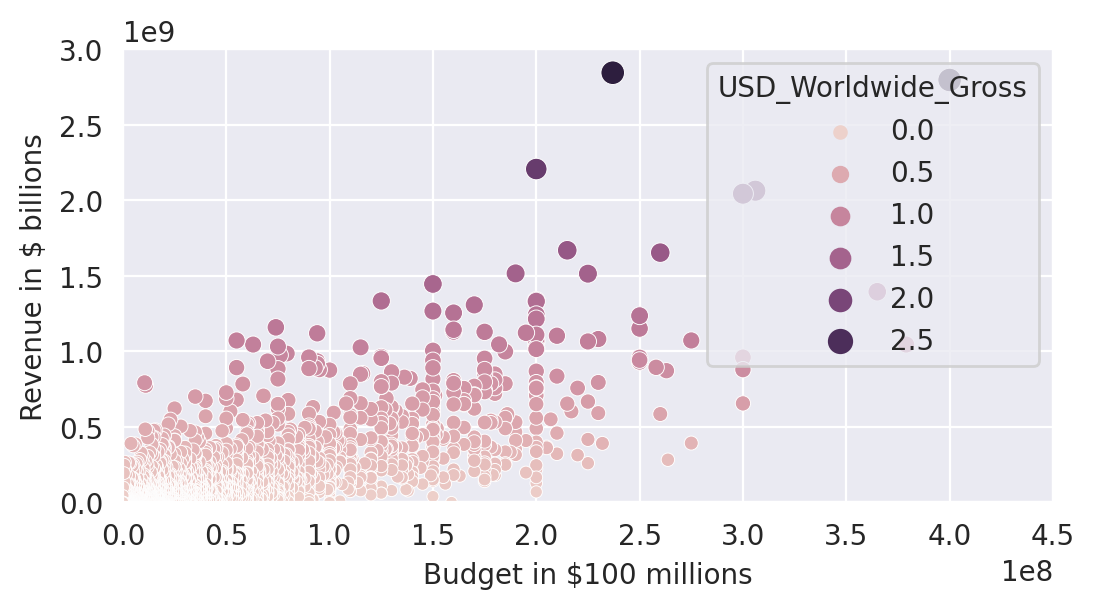

In [27]:
plt.figure(figsize=(6,3), dpi=200)

# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()

### Plotting Movie Releases over Time

THREE dimensions in this chart: the budget, the release date, and the worldwide revenue.

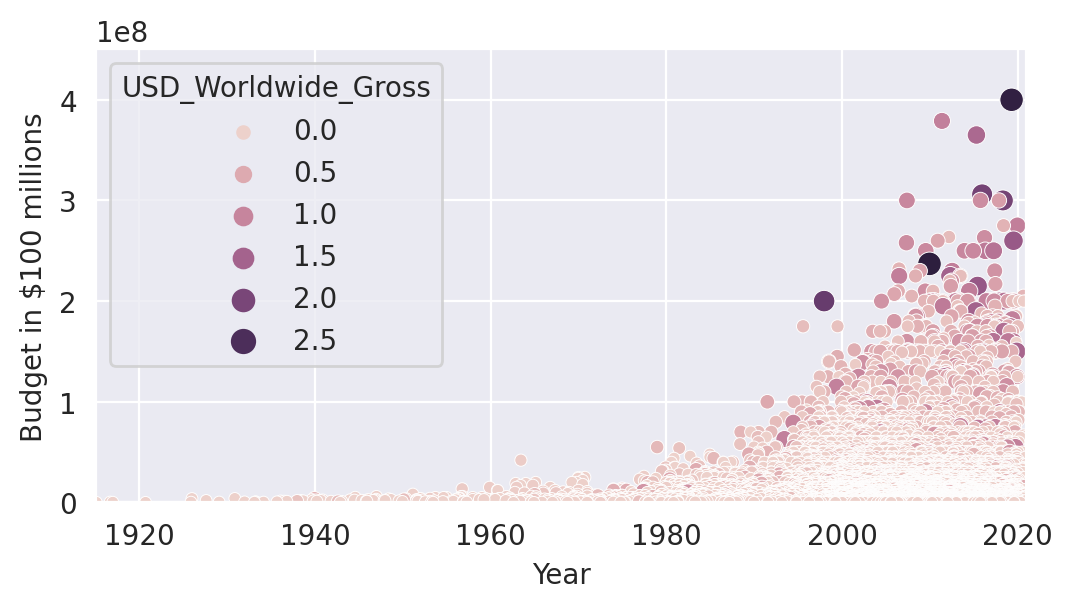

In [28]:
plt.figure(figsize=(6,3), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

<img src=img\bubble.png width=650>

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [29]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year
decades = years//10*10
data_clean['Decade'] = decades

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [30]:
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]

old_films.describe()

,Rank,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross,Decade
count,165.00,165.00,165.00,165.00,165.00
mean,"4,901.05","4,393,373.25","21,687,147.76","29,163,824.25","1,949.52"
std,844.98,"5,562,211.18","32,396,858.60","53,600,218.73",12.53
min,"1,403.00","60,000.00",0.00,0.00,"1,910.00"
25%,"4,560.00","1,250,000.00","3,700,000.00","4,000,000.00","1,940.00"
50%,"5,084.00","2,686,000.00","9,250,000.00","9,600,000.00","1,950.00"
75%,"5,459.00","5,000,000.00","28,200,000.00","31,678,778.00","1,960.00"
max,"6,045.00","42,000,000.00","198,680,470.00","390,525,192.00","1,960.00"


In [31]:
old_films.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross,Decade
1402,1403,1963-06-12,Cleopatra,42000000,57000000,71000000,1960
2440,2441,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
2674,2675,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
2729,2730,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
2771,2772,1969-04-01,Sweet Charity,20000000,8000000,8000000,1960


# Seaborn Regression Plots

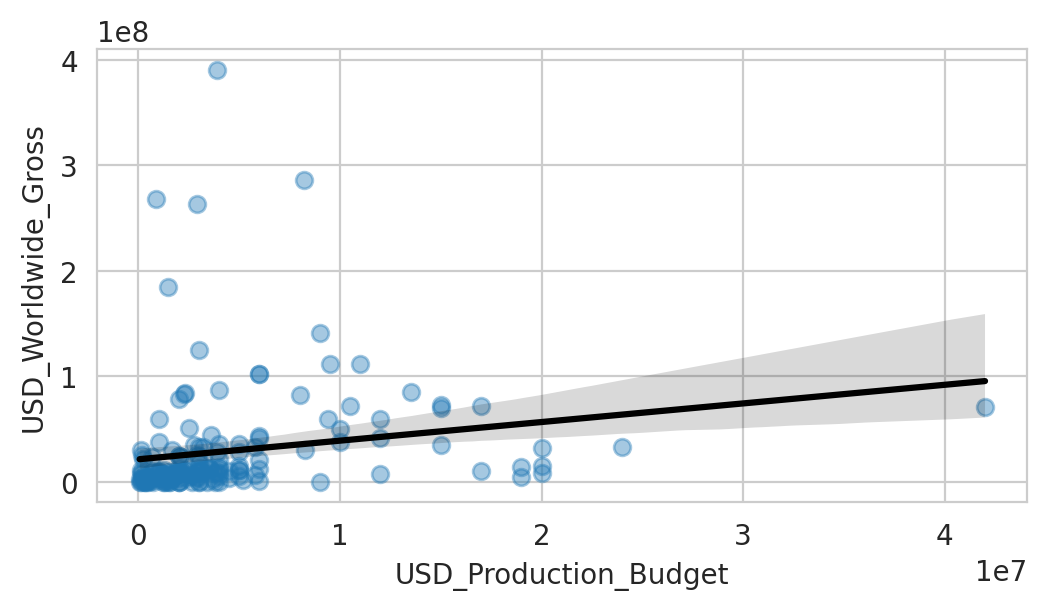

In [32]:
plt.figure(figsize=(6,3), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

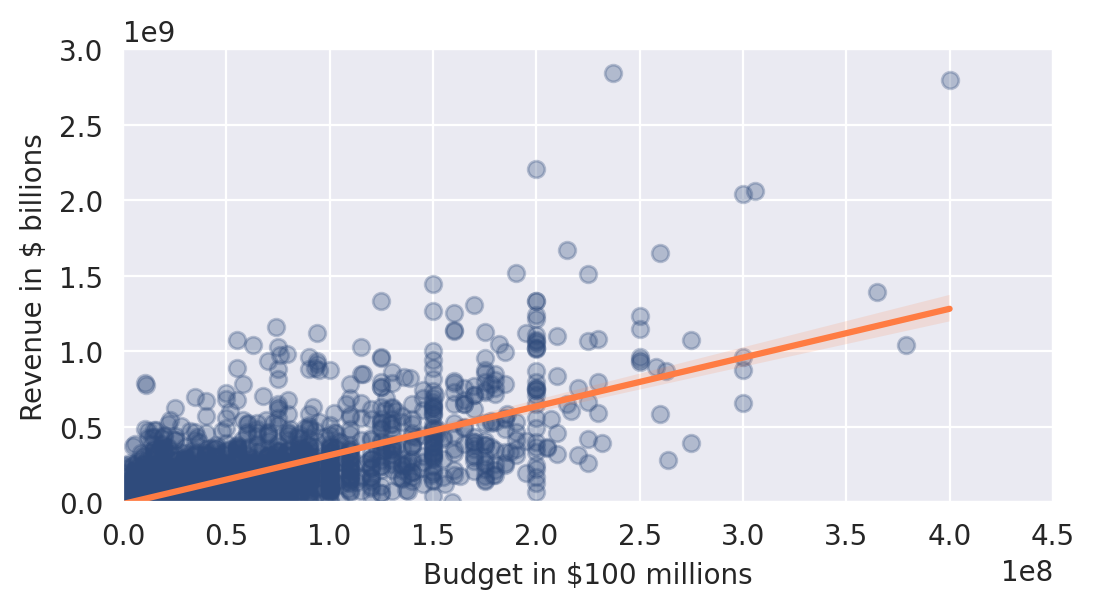

In [33]:
plt.figure(figsize=(6,3), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions') 

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

how can we find out what our model's estimates are for theta-one and theta-zero? And how can we run our own regression, regardless of whether we want to visualise it on a chart? For that, we can use scikit-learn.

In [41]:
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

# Find the best-fit line
regression.fit(X, y)

# Theta zero (y-intercept): negative revenue, unrealistic.
regression.intercept_

array([-10217431.3748557])

In [42]:
# Theta one (slope) , for every extra $1 in the budget, movie revenue increases by $3.1.
regression.coef_

array([[3.23180943]])

<img src=img\budget.png width=650> 

In [36]:
# R-squared : our simple model (one explanatory variable) explains about 55% of the variance in movie revenue.
regression.score(X, y)

0.5549902530281667

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [37]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

# Find the best-fit line
regression.fit(X, y)

print(f'The slope coef is : {regression.coef_[0]}')
print(f'The intercept is : {regression.intercept_[0]}')
print(f'The r-squared is : {regression.score(X, y)}')

The slope coef is : [1.76582247]
The intercept is : 21405907.05527443
The r-squared is : 0.0335780830401502


This makes sense considering how poorly our data points aligned with our line earlier.

<img src=img\old_films.png width=650> 

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 
Use new_films DataFrame

In [48]:
revenue_estimate = -10217431 + 3.23180943 * 350000000
print(f"The estimated revenue for a $350M film is around ${revenue_estimate/1000000:.0f}M")

The estimated revenue for a $350M film is around $1121M


Using the regression object:

In [44]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f"The estimated revenue for a $350M film is around ${revenue_estimate/1000000:.0f}M")

The estimated revenue for a $350M film is around $1121M


Alternative way, with predict():

In [43]:
X = new_films[["USD_Production_Budget"]]
y = new_films[["USD_Worldwide_Gross"]]

model = regression.fit(X,y)
print(model.predict([[350000000]]))
print(regression.coef_)
print(regression.intercept_)

[[1.12091587e+09]]
[[3.23180943]]
[-10217431.3748557]


c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
